In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob as glob
import os

In [2]:
seed=np.arange(0,500,2)
frame_skip=4
dt_ckf=0.025
dt_control=0.1
N_radar=3
N_steps=1000
move_radars = ["no-move_radars","move_radars"]
remove_tmp_images = ["remove_tmp_images"]
save_images = ["no-save_images"]

In [3]:
def get_rmse_array(filepath):
    results_mv_radar = sorted(list(glob.iglob(filepath+"*/*rmse*")))

    rmse_array = []
    for rmse_file in results_mv_radar:
        rmse_array_i = np.genfromtxt(rmse_file,delimiter=",",skip_header=1)
        rmse_array.append(rmse_array_i)

    rmse_array = np.stack(rmse_array)

    k = rmse_array[:,:,0].mean(axis=0)
    rmse = rmse_array[:,:,1]
    
    return k,rmse

In [4]:
experiment_name = os.path.join("experiment1",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move = get_rmse_array(filepath)

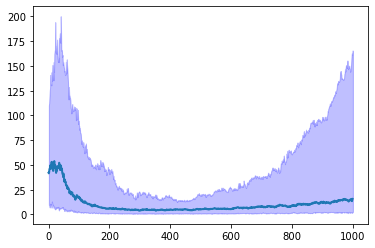

In [5]:
under_line = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

In [6]:
experiment_name = os.path.join("experiment1_pcrlb",f"N_radar={N_radar}-{move_radars[1]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_move_pcrlb = get_rmse_array(filepath)

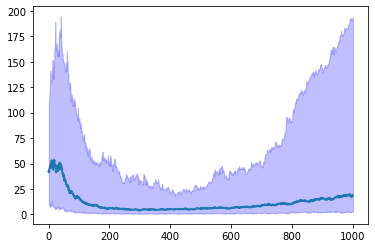

In [7]:
under_line = np.quantile(rmse_move_pcrlb,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_move_pcrlb,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_pcrlb,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

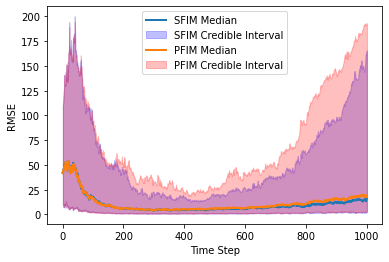

In [12]:
under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="SFIM Median") #mean curve.
plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="SFIM Credible Interval") #std curves.

under_line_nomove = np.quantile(rmse_move_pcrlb,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line_nomove = np.quantile(rmse_move_pcrlb,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move_pcrlb,q=0.5,axis=0), linewidth=2,label="PFIM Median") #mean curve.
plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="PFIM Credible Interval") #std curves.
plt.xlabel("Time Step")
plt.ylabel("RMSE")
plt.legend(loc="upper center")
plt.savefig(os.path.join("results","N_radars=3,SFIMvsPCRLB.pdf"))

In [13]:
experiment_name = os.path.join("experiment1",f"N_radar={N_radar}-{move_radars[0]}")
results_savepath = "results"
filepath = os.path.join(results_savepath,experiment_name)

k,rmse_nomove = get_rmse_array(filepath)

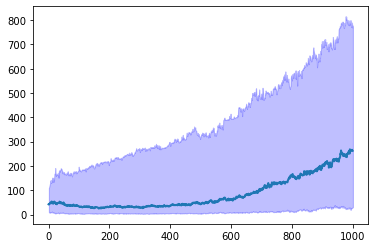

In [14]:
under_line = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2) #mean curve.
plt.fill_between(k, under_line, over_line, color='b', alpha=.25) #std curves.

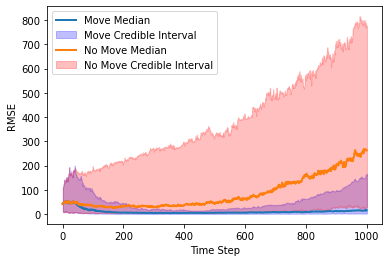

In [15]:
under_line_move = np.quantile(rmse_move,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line_move = np.quantile(rmse_move,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_move,q=0.5,axis=0), linewidth=2,label="Move Median") #mean curve.
plt.fill_between(k, under_line_move, over_line_move, color='b', alpha=.25,label="Move Credible Interval") #std curves.

under_line_nomove = np.quantile(rmse_nomove,0.1,axis=0) #np.clip(rmse.std(axis=0)*-1.96,a_min=0,a_max=np.inf)
over_line_nomove = np.quantile(rmse_nomove,0.9,axis=0) #rmse.std(axis=0)*1.96

plt.plot(np.quantile(rmse_nomove,q=0.5,axis=0), linewidth=2,label="No Move Median") #mean curve.
plt.fill_between(k, under_line_nomove, over_line_nomove, color='r', alpha=.25,label="No Move Credible Interval") #std curves.
plt.xlabel("Time Step")
plt.ylabel("RMSE")
plt.legend(loc="upper left")
plt.savefig(os.path.join("results","N_radars=3,SFIM.pdf"))